# Training Results

Below are some graphs to show the results from training using MADDPG.

First I load the training results and then define the variables and methods I'll use to show the data.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import os
%matplotlib inline

In [56]:
results_folder = 'D:/Data/Udacity/experiments/Tennis/maddpg-lr_0_0001-400_300-ts_250K/results'
maddpg_scores = np.load(os.path.join(results_folder, 'maddpg_results.npy'))

In [57]:
def calc_stats(algo_scores):
    algo_last_10_scores = deque(maxlen=10)
    algo_mean_10_scores = []
    for i, score in enumerate(algo_scores):
        algo_last_10_scores.append(score)
        algo_mean_10_scores.append(np.mean(algo_last_10_scores))
    algo_tot_scores = np.zeros((2, len(algo_mean_10_scores)))
    algo_tot_scores[0, :] = algo_scores
    algo_tot_scores[1, :] = algo_mean_10_scores
    algo_max_r = np.max(algo_tot_scores, axis=0)
    algo_min_r = np.min(algo_tot_scores, axis=0)
    algo_mean_r = algo_mean_10_scores
    algo_x = np.arange(len(algo_mean_r))
    return algo_x, algo_max_r, algo_min_r, algo_mean_r

In [58]:
def plot_results(x, max_x, min_x, mean_x, training_agent):
    fig, axs = plt.subplots(1, 1, figsize=(15,10), sharey=False, sharex=True)
    axs.plot(max_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(min_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(mean_x, 'b-', label='Moving Average(10 scores)', linewidth=2)
    axs.fill_between(x, min_x, max_x, facecolor='orange', alpha=0.3)
    axs.set_title('{} Scores (Training)'.format(training_agent))
    axs.plot(len(mean_x)-1, mean_x[-1], marker='o', color='red', markersize=6)
    plt.annotate('{} Episodes'.format(len(mean_x)), 
             (len(mean_x)+10, 1.58), 
             fontsize=12,
             color='red'
            )
    plt.axhline(y=0.5, color='red', ls='--')
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    axs.legend(loc='upper left')
    plt.savefig('maddpg_summary_scores.png', bbox_inches='tight')
    plt.show()

## MADDPG Training Results

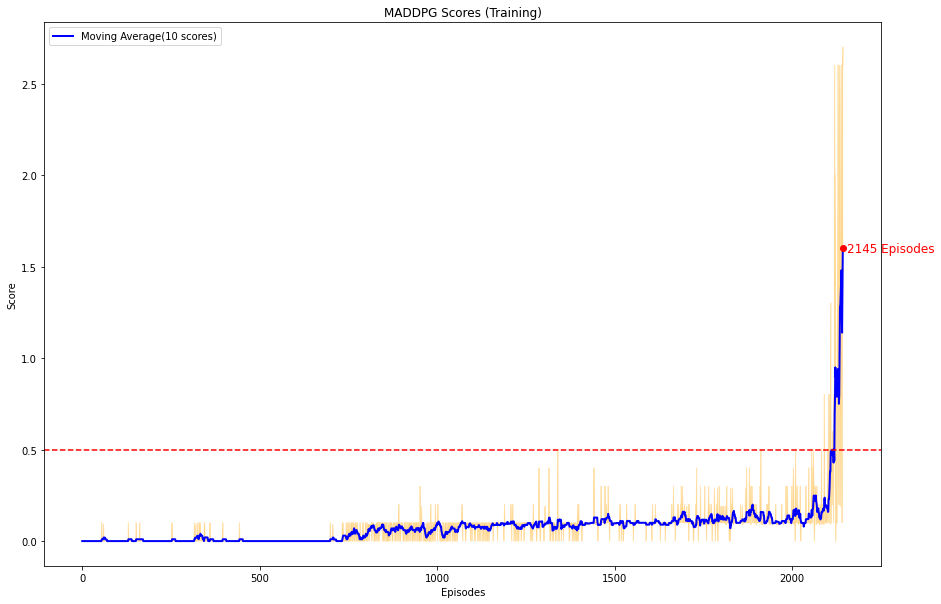

In [59]:
maddpg_x, maddpg_max_r, maddpg_min_r, maddpg_mean_r = calc_stats(maddpg_scores)

plot_results(maddpg_x, maddpg_max_r, maddpg_min_r, maddpg_mean_r, 'MADDPG')